In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [2]:
# Load the dataset
data = pd.read_csv('CreditCardData.csv')

In [3]:
data

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,#3203 892,13-Oct-20,Tuesday,22,MasterCard,Tap,£15,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,0
99996,#3304 849,14-Oct-20,Wednesday,23,MasterCard,PIN,£7,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,0
99997,#3532 129,13-Oct-20,Tuesday,11,MasterCard,PIN,£21,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,0
99998,#3107 092,14-Oct-20,Wednesday,22,Visa,Tap,£25,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,0


In [4]:
# Display basic information about the dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction ID          100000 non-null  object 
 1   Date                    100000 non-null  object 
 2   Day of Week             100000 non-null  object 
 3   Time                    100000 non-null  int64  
 4   Type of Card            100000 non-null  object 
 5   Entry Mode              100000 non-null  object 
 6   Amount                  99994 non-null   object 
 7   Type of Transaction     100000 non-null  object 
 8   Merchant Group          99990 non-null   object 
 9   Country of Transaction  100000 non-null  object 
 10  Shipping Address        99995 non-null   object 
 11  Country of Residence    100000 non-null  object 
 12  Gender                  99996 non-null   object 
 13  Age                     100000 non-null  float64
 14  Bank                 

In [5]:
# Drop any non-numeric columns or columns that are not relevant for modeling
data = data.drop(['Transaction ID', 'Date', 'Shipping Address'], axis=1)

In [6]:
# Handle missing values
data['Amount'] = data['Amount'].str.replace('£', '').astype(float)
data = data.dropna()  # Drop rows with missing values

In [8]:
# Display the DataFrame after handling duplicates
print("DataFrame after removing duplicate values:")
data

DataFrame after handling duplicates:


,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Country of Residence,Gender,Age,Bank,Fraud
0,Wednesday,19,Visa,Tap,5.0,POS,Entertainment,United Kingdom,United Kingdom,M,25.2,RBS,0
1,Wednesday,17,MasterCard,PIN,288.0,POS,Services,USA,USA,F,49.6,Lloyds,0
2,Wednesday,14,Visa,Tap,5.0,POS,Restaurant,India,India,F,42.2,Barclays,0
3,Tuesday,14,Visa,Tap,28.0,POS,Entertainment,United Kingdom,United Kingdom,F,51.0,Barclays,0
4,Tuesday,23,Visa,CVC,91.0,Online,Electronics,USA,United Kingdom,M,38.0,Halifax,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Tuesday,22,MasterCard,Tap,15.0,POS,Electronics,United Kingdom,United Kingdom,F,53.8,Halifax,0
99996,Wednesday,23,MasterCard,PIN,7.0,ATM,Children,Russia,Russia,M,45.0,Barclays,0
99997,Tuesday,11,MasterCard,PIN,21.0,ATM,Subscription,United Kingdom,United Kingdom,F,46.5,HSBC,0
99998,Wednesday,22,Visa,Tap,25.0,POS,Products,United Kingdom,United Kingdom,M,48.2,Barclays,0


In [27]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['Day of Week', 'Time', 'Age', 'Entry Mode', 'Fraud', 'Type of Card', 'Type of Transaction', 'Merchant Group', 'Country of Transaction', 'Country of Residence', 'Gender', 'Bank']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

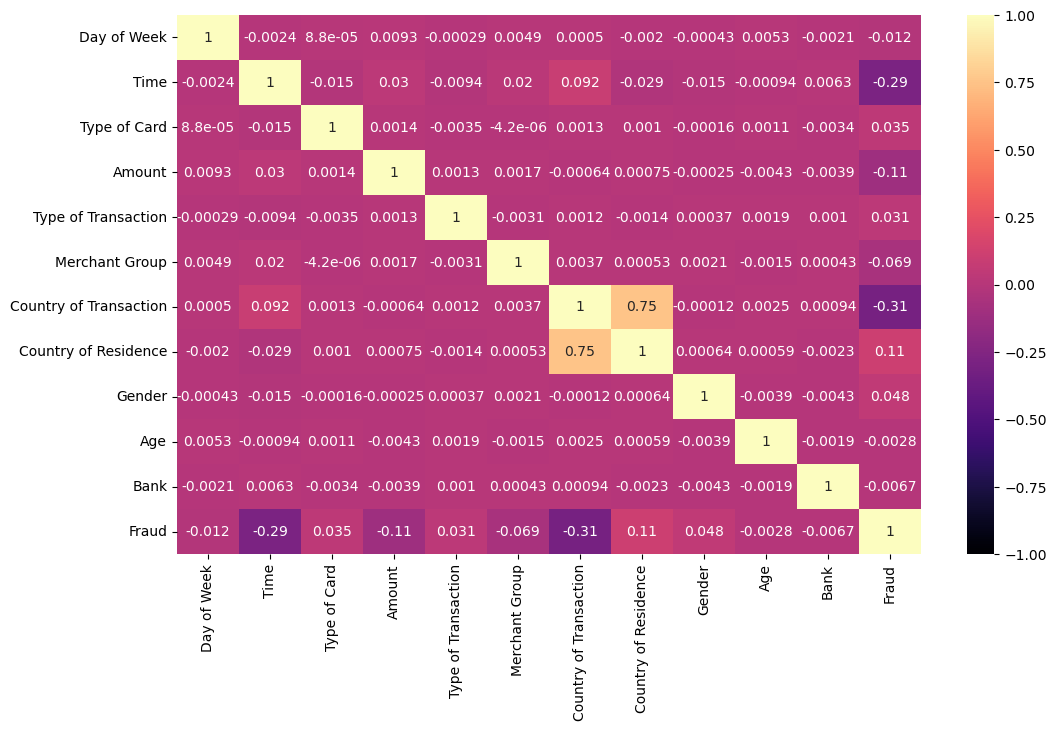

In [12]:
# Visualize correlation matrix for numeric columns only
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 7))
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1, cmap='magma')
plt.show()

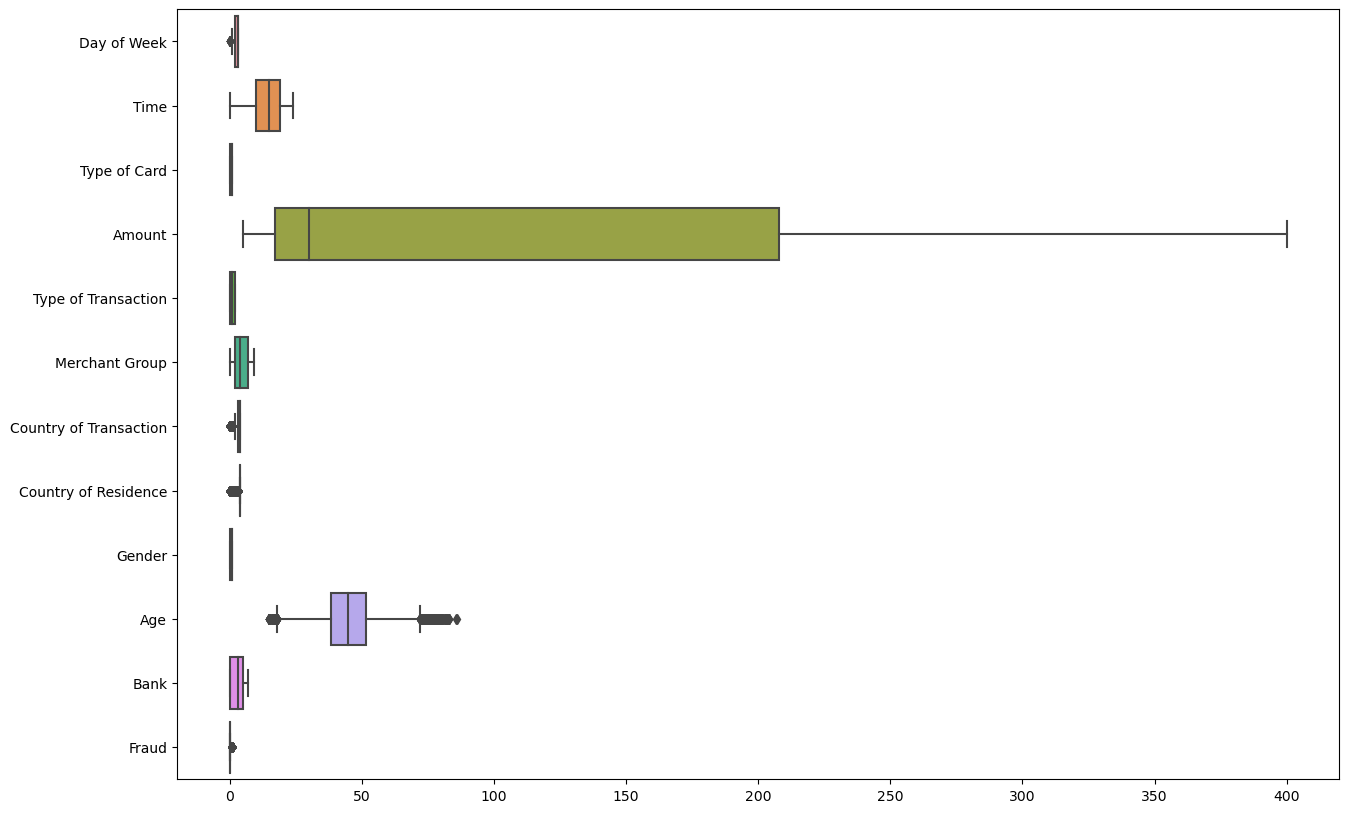

In [11]:
# Visualize boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, orient='h')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1300x1700 with 0 Axes>

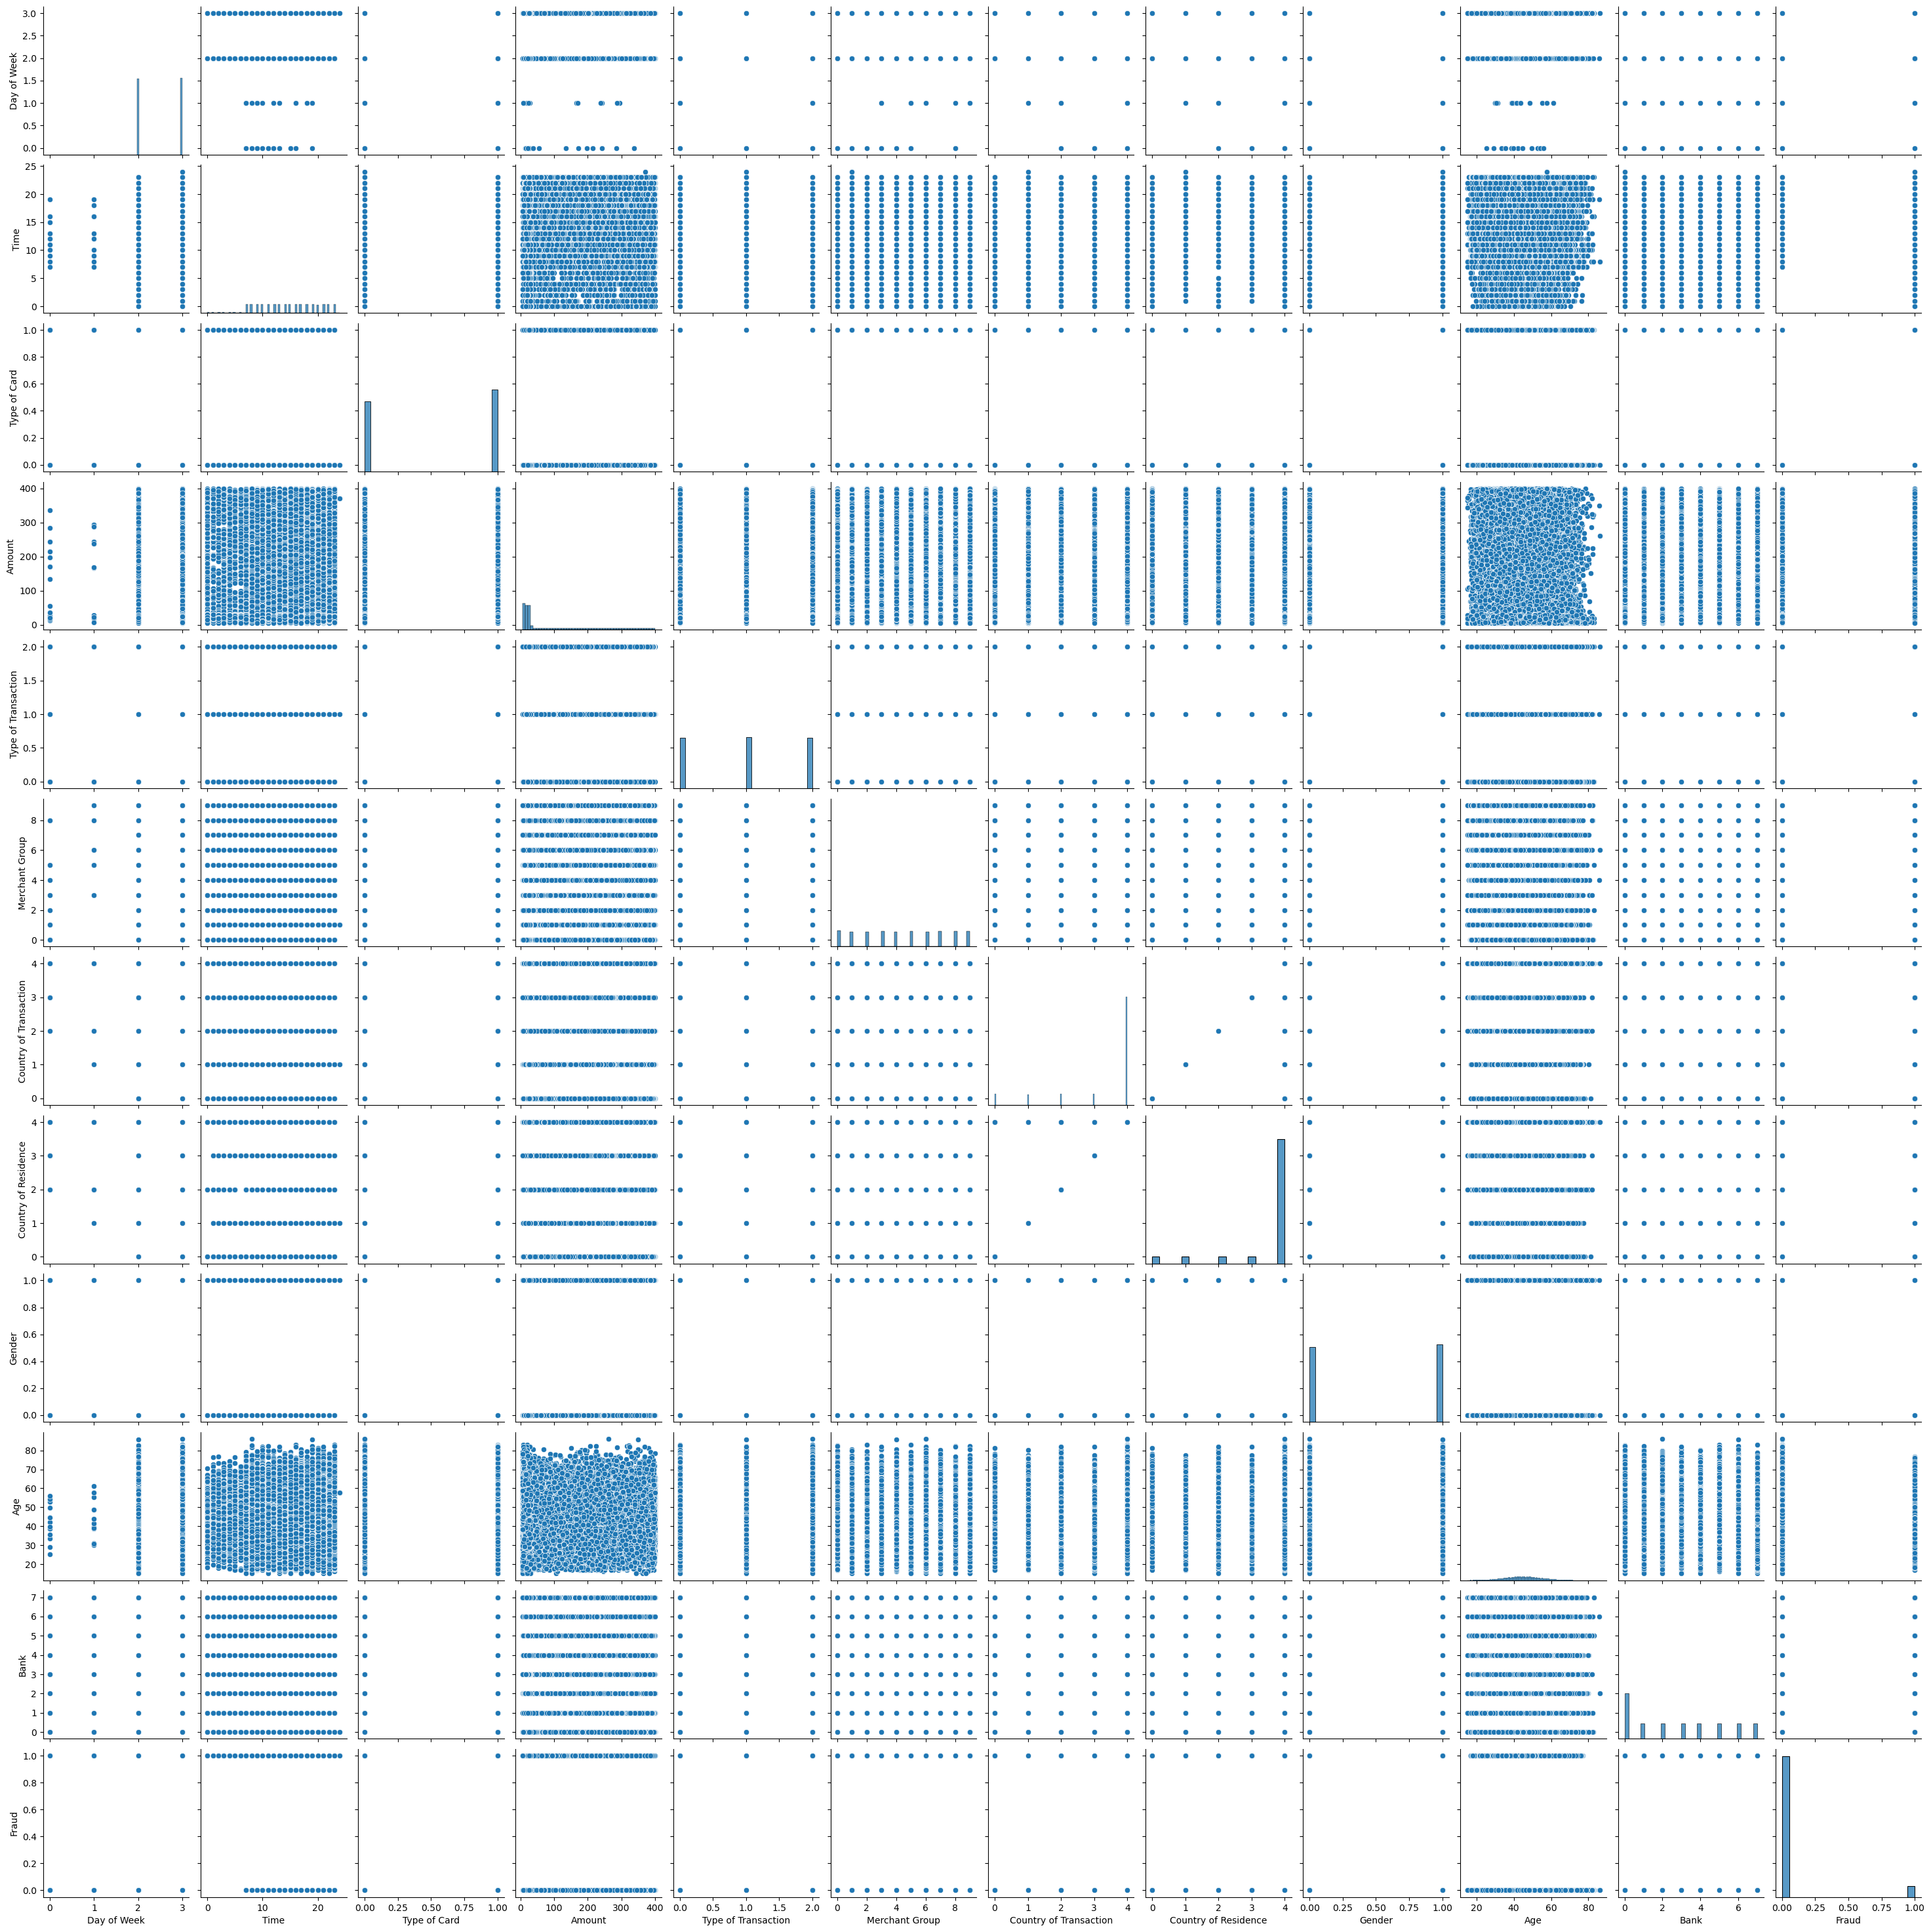

In [13]:
# Visualize pairplot
plt.figure(figsize=(13, 17))
sns.pairplot(data=data)
plt.show()

In [65]:
print(data.columns)

Index(['Day of Week', 'Time', 'Type of Card', 'Entry Mode', 'Amount',
       'Type of Transaction', 'Merchant Group', 'Country of Transaction',
       'Country of Residence', 'Gender', 'Age', 'Bank', 'Fraud'],
      dtype='object')


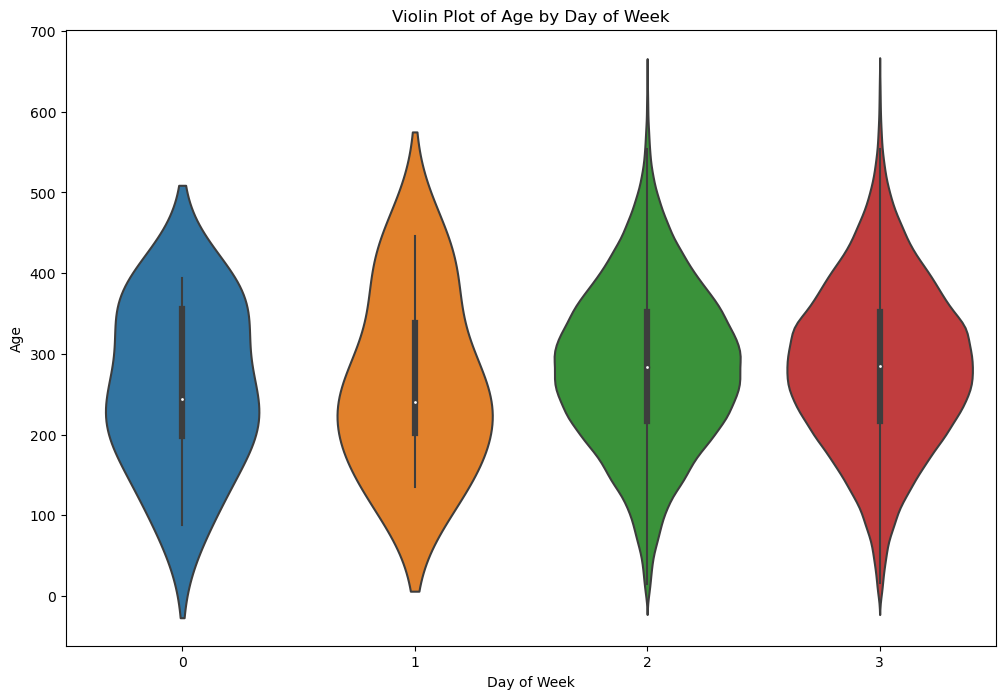

In [66]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Day of Week', y='Age', data=data)
plt.title('Violin Plot of Age by Day of Week')
plt.show()

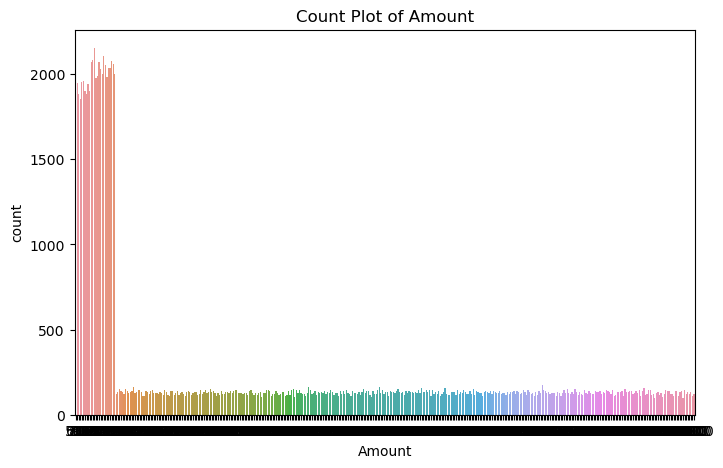

In [72]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Amount', data=data)
plt.title('Count Plot of Amount')
plt.show()

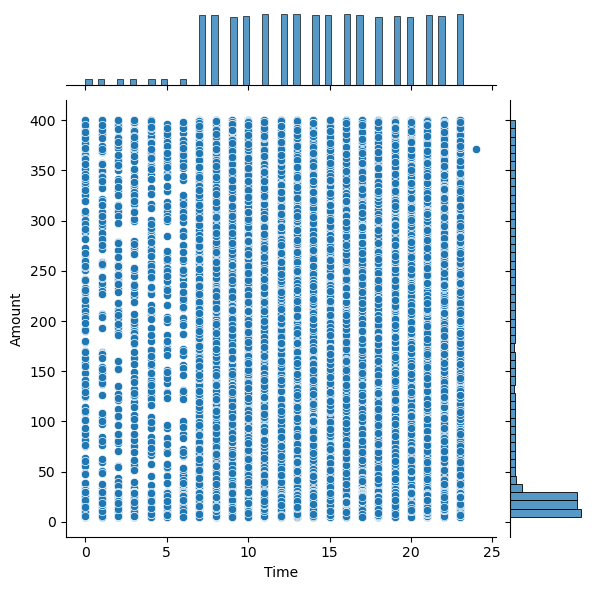

In [73]:
sns.jointplot(x='Time', y='Amount', data=data, kind='scatter')
plt.show()

In [28]:
# Define numerical and categorical features
numeric_features = ['Time', 'Entry Mode', 'Fraud', 'Age']
categorical_features = ['Day of Week', 'Type of Card', 'Type of Transaction', 'Merchant Group', 'Country of Transaction', 'Country of Residence', 'Gender', 'Bank']

In [29]:
# Create transformers for numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [30]:
# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', LogisticRegression())])

In [31]:
# Segmenting the data into features (X) and target variable (y)
features = data.drop('Fraud', axis=1)
target = data['Fraud']

In [32]:
# Dividing the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [45]:
# Constructing a Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)

print(f'Logistic Regression Accuracy: {logistic_accuracy:.4f}')

Logistic Regression Accuracy: 0.9549


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
# Building a Decision Tree Classifier model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_predictions)

print(f'Decision Tree Classifier Accuracy: {tree_accuracy:.4f}')

Decision Tree Classifier Accuracy: 0.9733


In [47]:
# Generating the Confusion Matrix for Decision Tree Classifier
tree_confusion_matrix = confusion_matrix(y_test, tree_predictions)
print('Confusion Matrix for Decision Tree Classifier:')
print(tree_confusion_matrix)

Confusion Matrix for Decision Tree Classifier:
[[18221   287]
 [  246  1243]]


In [48]:
# Generating the Confusion Matrix for Logistic Regression
logistic_confusion_matrix = confusion_matrix(y_test, logistic_predictions)
print('Confusion Matrix for Logistic Regression:')
print(logistic_confusion_matrix)

Confusion Matrix for Logistic Regression:
[[18290   218]
 [  684   805]]


In [49]:
# Producing the Classification Report for Decision Tree Classifier
report_tree = classification_report(y_test, tree_predictions)
print('Classification Report for Decision Tree Classifier:')
print(report_tree)

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     18508
           1       0.81      0.83      0.82      1489

    accuracy                           0.97     19997
   macro avg       0.90      0.91      0.90     19997
weighted avg       0.97      0.97      0.97     19997



In [50]:
# Producing the Classification Report for Logistic Regression
report_logistic = classification_report(y_test, logistic_predictions)
print('Classification Report for Logistic Regression:')
print(report_logistic)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18508
           1       0.79      0.54      0.64      1489

    accuracy                           0.95     19997
   macro avg       0.88      0.76      0.81     19997
weighted avg       0.95      0.95      0.95     19997



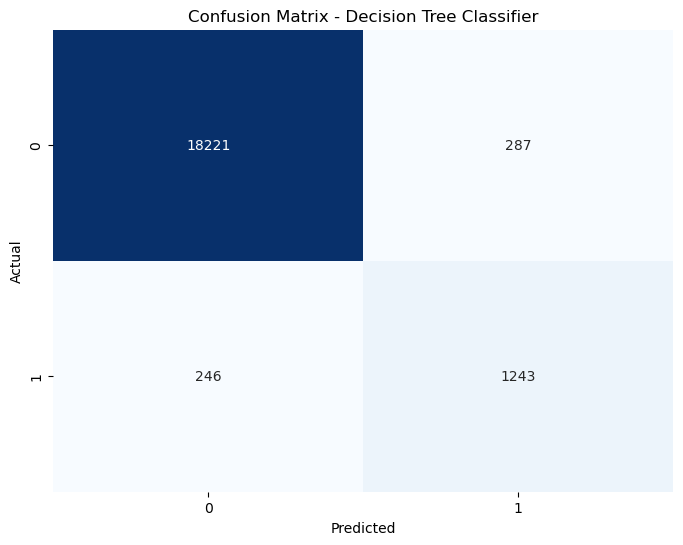

In [51]:
# Visualizing the Confusion Matrix for Decision Tree Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(tree_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

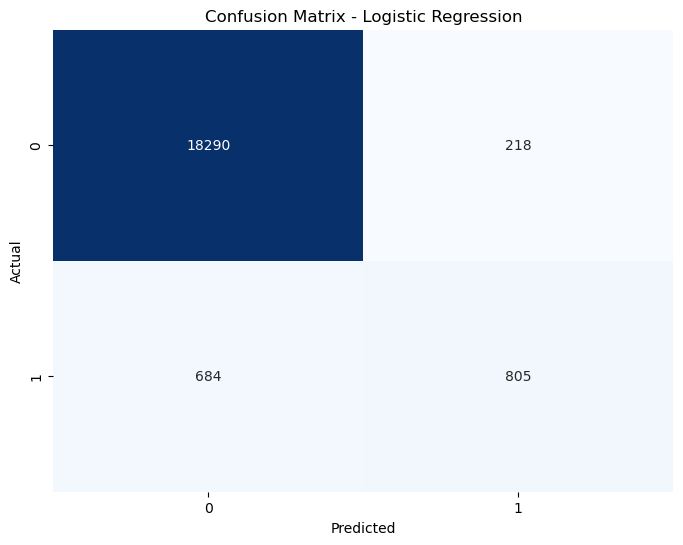

In [52]:
# Visualizing the Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(logistic_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

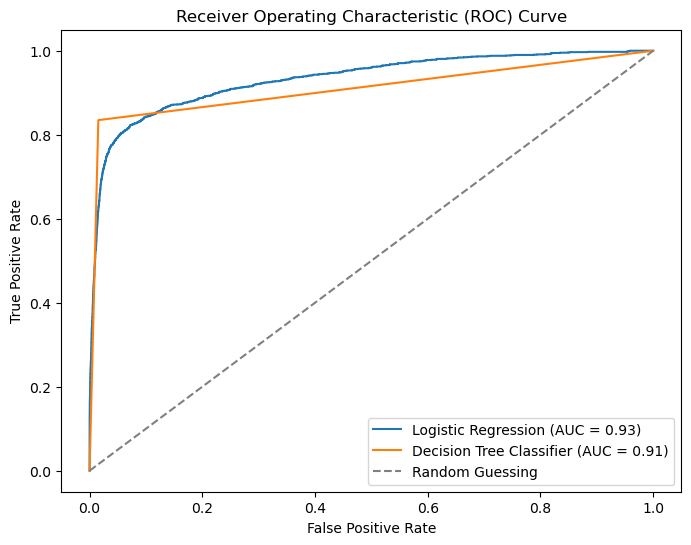

In [59]:
# ROC Curves
plt.figure(figsize=(8, 6))
# Logistic Regression ROC Curve
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
# Decision Tree Classifier ROC Curve
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_model.predict_proba(X_test)[:, 1])
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree Classifier (AUC = {roc_auc_tree:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

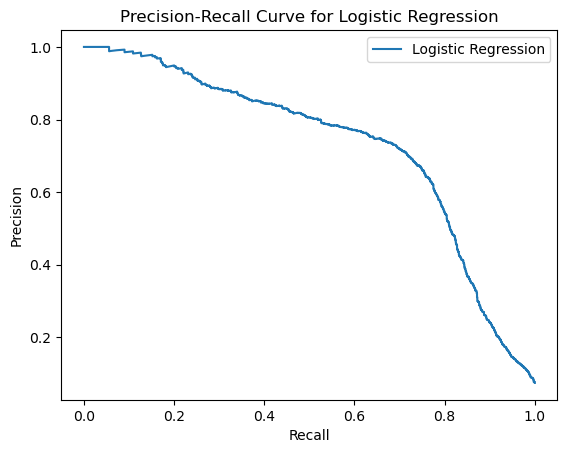

In [60]:
from sklearn.metrics import precision_recall_curve

# Assuming 'logistic_model' is your Logistic Regression model
precision, recall, thresholds = precision_recall_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])

plt.plot(recall, precision, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend()
plt.show()